In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img=cv2.imread('Q7.png')


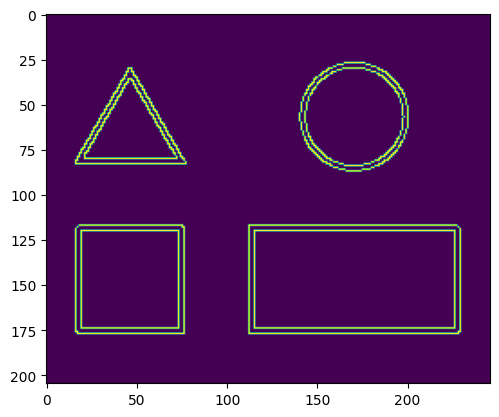

In [16]:
canny_img=cv2.Canny(img,100,200)
plt.imshow(canny_img)

4


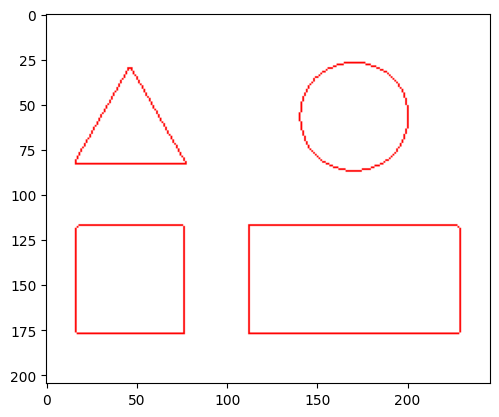

In [17]:
# contours,_=cv2.findContours(canny_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

contours,_=cv2.findContours(canny_img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
white_bg = (np.ones(shape=img.shape))*255
cv2.drawContours(white_bg,contours,-1,(255,0,0))
plt.imshow(white_bg)

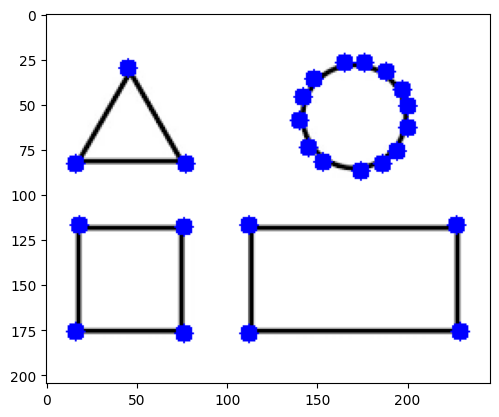

In [19]:
corners = []
for cnt in contours:
    epsilon = 0.01 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    corners.append(approx)

# Draw circles at the corner points
for c in corners:
    for point in c:
        cv2.circle(img, tuple(point[0]), 5, (0, 0, 255), -1)


plt.imshow(img)
plt.show()

4


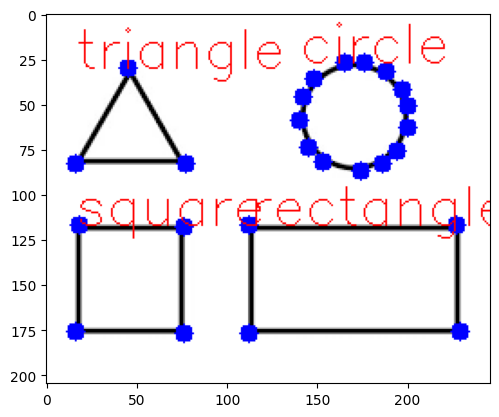

In [21]:
title=""
cop= img.copy()
print(len(corners))
for c in corners:
  
    x,y,w,h=cv2.boundingRect(c)
    if(len(c)>4):
        title = "circle"
    elif(len(c)==4 and (w/h>0.9 and w/h<1.1)):
        title="square"
    elif(len(c)==4 and (w/h<=0.9 or w/h>=1.1)):
        title="rectangle"
    else:
        title="triangle"
    cv2.putText(cop,title,(x,y), cv2.FONT_HERSHEY_SIMPLEX,1, (255, 0, 0))

plt.imshow(cop)


